In [13]:
from google.colab import files
files.upload()


Saving Mall_Customers.csv to Mall_Customers (1).csv


{'Mall_Customers (1).csv': b'CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)\n1,Female,19,17,23\n2,Male,20,19,26\n3,Female,21,21,29\n4,Male,22,23,32\n5,Female,23,25,35\n6,Male,24,27,38\n7,Female,25,29,41\n8,Male,26,31,44\n9,Female,27,33,47\n10,Male,28,35,50\n11,Female,29,37,53\n12,Male,30,39,56\n13,Female,31,41,59\n14,Male,32,43,62\n15,Female,33,45,65\n16,Male,34,47,68\n17,Female,35,49,71\n18,Male,36,51,74\n19,Female,37,53,77\n20,Male,38,55,80\n21,Female,39,57,83\n22,Male,40,59,86\n23,Female,41,61,89\n24,Male,42,63,92\n25,Female,43,65,95\n26,Male,44,67,98\n27,Female,45,69,21\n28,Male,46,71,24\n29,Female,47,73,27\n30,Male,48,75,30\n31,Female,49,77,33\n32,Male,50,79,36\n33,Female,51,81,39\n34,Male,52,83,42\n35,Female,53,85,45\n36,Male,54,87,48\n37,Female,55,89,51\n38,Male,56,91,54\n39,Female,57,93,57\n40,Male,58,95,60\n41,Female,59,97,63\n42,Male,60,99,66\n43,Female,61,101,69\n44,Male,62,103,72\n45,Female,63,105,75\n46,Male,64,107,78\n47,Female,65,109,81\n48,Male,66,111,8

In [15]:
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,19,17,23
1,2,Male,20,19,26
2,3,Female,21,21,29
3,4,Male,22,23,32
4,5,Female,23,25,35


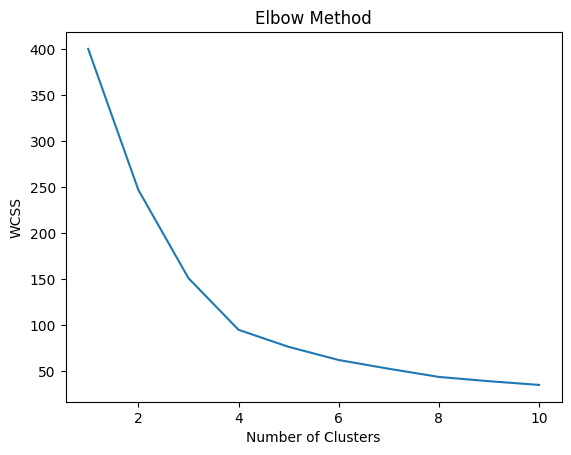

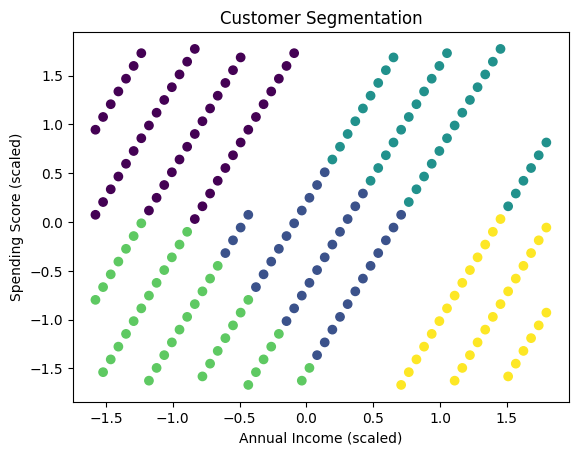

In [16]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Select features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'])
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Customer Segmentation")
plt.show()
